In [1]:
import warnings 
warnings.filterwarnings("ignore") 

import seaborn as sns
import numpy as np
import pandas as pd
train=pd.read_csv(r'C:\Users\hp\Desktop\edureka\assignments\training-Pacific_train\Pacific_train.csv')
test=pd.read_csv(r'C:\Users\hp\Desktop\edureka\assignments\training-Pacific_train\Pacific_test.csv')

#set(train['Status'])

#f.head(2)

In [5]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [8]:
f=train.select_dtypes(include=['int64'])

In [7]:
df_corr = f.corr()['Maximum Wind']
features_list = df_corr.sort_values(ascending=False)
print("all these {} are strongly correlated values with Maximum Wind:\n{}".format(len(features_list), features_list))

all these 16 are strongly correlated values with Maximum Wind:
Maximum Wind        1.000000
Time               -0.003257
Minimum Pressure   -0.050730
Low Wind NE        -0.083837
Low Wind SE        -0.085763
Low Wind NW        -0.086191
Low Wind SW        -0.089288
Moderate Wind NE   -0.093524
Moderate Wind NW   -0.094815
Moderate Wind SE   -0.094988
Moderate Wind SW   -0.096661
High Wind NE       -0.099167
High Wind NW       -0.099882
High Wind SE       -0.100023
Date               -0.100092
High Wind SW       -0.101078
Name: Maximum Wind, dtype: float64


In [9]:
numeric_features=train.select_dtypes(include=['int64']).columns.tolist()

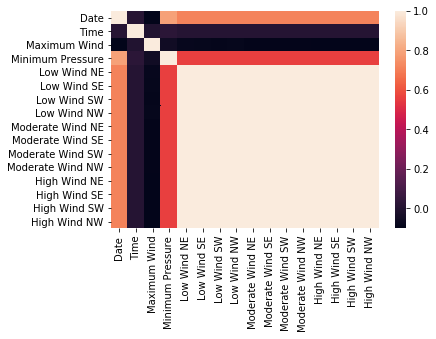

In [10]:
sns.heatmap(train[numeric_features].corr())
#Since Most of the features looks correlated so let's drop them and use which are different coloured.

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [13]:
features_selected=['Date', 'Time','Maximum Wind','Minimum Pressure','Low Wind NE']
label='Status'
X_train=train[features_selected]
y_train=train[label]
X_test=test[features_selected]
y_test=test[label]

#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
pred_DT=model_DT.predict(X_test)
confusion_matrix_DT=confusion_matrix(y_test,pred_DT)
print('cross value score of Decision tree:',cross_val_score(model_DT, X_train, y_train, cv=10).mean())
print('precision score:',precision_score(y_test,pred_DT,pos_label='positive',average='micro'))
print('recall score:',recall_score(y_test,pred_DT,pos_label='positive',average='micro'))

cross value score of Decision tree: 0.9641022203603529
precision score: 0.9667144906743185
recall score: 0.9667144906743185


In [14]:
#Random Forests 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train,y_train)
pred_RF=model_RF.predict(X_test)
print('cross value score of Random Forest:',cross_val_score(model_RF, X_train, y_train, cv=10).mean())
confusion_matrix_RF=confusion_matrix(y_test,pred_RF)
print('precision score:',precision_score(y_test,pred_RF,pos_label='positive',average='micro'))
print('recall score:',recall_score(y_test,pred_RF,pos_label='positive',average='micro'))

cross value score of Random Forest: 0.9595735605075303
precision score: 0.9611669057867049
recall score: 0.9611669057867049


In [15]:
#Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
pred_NB=model_NB.predict(X_test)
print('cross value score of Naive Bayes:',cross_val_score(model_NB, X_train, y_train, cv=10).mean())
confusion_matrix_NB=confusion_matrix(y_test,pred_NB)
print('precision score:',precision_score(y_test,pred_NB,pos_label='positive',average='micro'))
print('recall score:',recall_score(y_test,pred_NB,pos_label='positive',average='micro'))

cross value score of Naive Bayes: 0.5647022285047114
precision score: 0.567479674796748
recall score: 0.567479674796748


In [16]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model_svc = SVC(gamma='auto')
model_svc.fit(X_train,y_train)
pred_SVC=model_svc.predict(X_test)
print('cross value score of SVM:',cross_val_score(model_svc, X_train, y_train, cv=10).mean())
confusion_matrix_NB=confusion_matrix(y_test,pred_SVC)
print('precision score:',precision_score(y_test,pred_SVC,pos_label='positive',average='micro'))
print('recall score:',recall_score(y_test,pred_SVC,pos_label='positive',average='micro'))

cross value score of SVM: 0.5474149429947524
precision score: 0.5651841224294596
recall score: 0.5651841224294596


In [18]:
result=['RandomForestClassifier', 0.96]
result=pd.DataFrame(result)
#writing output to output.csv
result.to_csv('output.csv', header=False, index=False)